# Forecasting

Data source : https://ourworldindata.org/grapher/air-passengers-carried

## Imports

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def unique(liste):
    
    unique = []

    for e in liste:
        if e not in unique:
            unique.append(e)
            
    return unique


def load_data(filepath, country):

    Entity=[]
    Code = []
    Year=[]
    Passengers=[]


    with open(filepath, newline='') as file:

        filereader = csv.reader(file, delimiter=',', quotechar='"')

        for row in filereader:

            if row[1] == country :
            
                Entity.append(row[0])
                Code.append(row[1])
                Year.append(row[2])
                Passengers.append(row[3])
                
    return Entity, Code, Year, Passengers

## Variables

In [3]:

Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')
Entity_usa, Code_usa, Year_usa, Passengers_usa = load_data(filepath='data_input/air-passengers-carried.csv', country='USA')

data_fra = zip(Year_fra, Passengers_fra)
data_usa = zip(Year_usa, Passengers_usa)

print(Entity_fra[:1], Entity_fra[-1:])
print(Code_fra[:1], Code_fra[-1:])
print(Year_fra[:1], Year_fra[-1:])
print(Passengers_fra[:1], Passengers_fra[-1:])


['France'] ['France']
['FRA'] ['FRA']
['1970'] ['2021']
['9108000'] ['32000528']


## Polynomial Regression

### With numpy

In [4]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int')
y = np.array(Passengers_fra, dtype='int')

In [5]:
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
y_pred = [p(year) for year in x ]

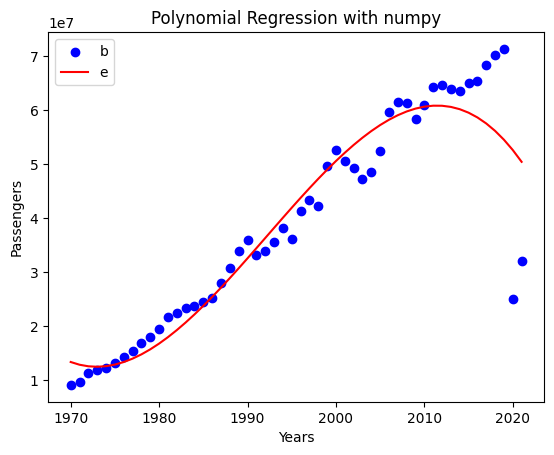

In [6]:
plt.scatter(x, y, color='blue', label='data points')
plt.plot(x, y_pred, color='red', label='regression')

plt.title('Polynomial Regression with numpy')
plt.xlabel('Years')
plt.ylabel('Passengers')
plt.legend('best')
 
plt.show();

### With Sklearn

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [8]:
Entity_fra, Code_fra, Year_fra, Passengers_fra = load_data(filepath='data_input/air-passengers-carried.csv', country='FRA')

x = np.array(Year_fra, dtype='int').reshape(-1, 1)
y = np.array(Passengers_fra, dtype='int').reshape(-1, 1)

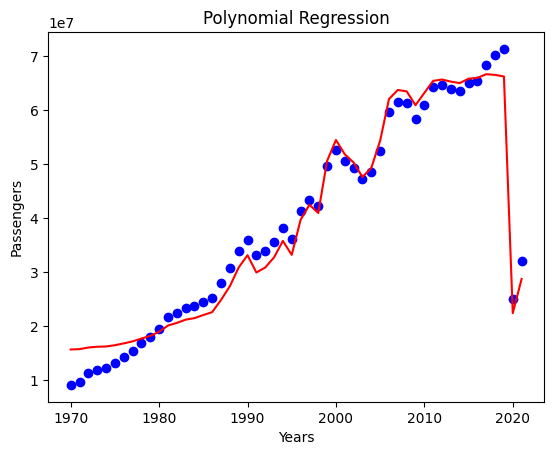

In [9]:
poly = PolynomialFeatures(degree=4)

y_poly = poly.fit_transform(y)

lin = LinearRegression()
lin.fit(y_poly, y)

# Visualization
plt.scatter(x, y, color='blue')
 
plt.plot(x, lin.predict(poly.fit_transform(y)),
         color='red')
plt.title('Polynomial Regression')
plt.xlabel('Years')
plt.ylabel('Passengers')
 
plt.show()